In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [5]:
df=pd.read_csv('./data/AAPL_2015_to_2020_yahoo_finance.csv')

## Apple events and quarterly results

In [6]:
#List of dates for the apple events
apple_event_dates_str=["2015-03-09","2015-06-10","2015-09-09",
"2016-03-21","2016-06-15","2016-09-07", "2016-10-27",
"2017-06-07", "2017-09-12",
"2018-03-27","2018-06-06", "2018-09-12", "2018-10-30",
"2019-03-25","2019-06-05","2019-09-10","2019-12-02",
"2020-06-24","2020-09-15","2020-10-13","2020-11-10"]

#apple_event_dates_pd = pd.DataFrame({'Date':[dt.datetime.strptime(date, "%Y-%m-%d").date() for date in apple_event_dates_str]})
apple_event_dates=[dt.datetime.strptime(date, "%Y-%m-%d").date() for date in apple_event_dates_str]

In [22]:
#https://finance.yahoo.com/calendar/earnings?symbol=AAPL
df_quarterly_earnings=pd.read_excel('./data/Earnings_Apple.xlsx')

In [25]:
df_quarterly_earnings=df_quarterly_earnings.drop(index=[0,1,2,3,4,5,6,7])

In [30]:
df_quarterly_earnings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 8 to 31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Symbol         24 non-null     object
 1   Company        24 non-null     object
 2   Earnings Date  24 non-null     object
 3   EPS Estimate   24 non-null     object
 4   Reported EPS   24 non-null     object
 5   Surprise(%)    24 non-null     object
dtypes: object(6)
memory usage: 1.3+ KB


In [ ]:
dt.datetime.strptime(date, "%Y-%m-%d").date() for date in apple_event_dates_str]

In [7]:
#Create a new dataframe only containing stock data from Apple event-days
apple_event_and_stock_data=df[df.Date.isin(apple_event_dates_str)]

In [8]:
apple_event_and_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
44,2015-03-09,31.990000,32.392502,31.264999,31.785000,28.890726,354114000
109,2015-06-10,31.980000,32.334999,31.962500,32.220001,29.408445,156349200
172,2015-09-09,28.440001,28.504999,27.442499,27.537500,25.248312,340043200
305,2016-03-21,26.482500,26.912500,26.285000,26.477501,24.512644,142010800
365,2016-06-15,24.455000,24.602501,24.257500,24.285000,22.619728,117780800
423,2016-09-07,26.957500,27.190001,26.767500,27.090000,25.369074,169457200
459,2016-10-27,28.847500,28.965000,28.525000,28.620001,26.801878,138248000
611,2017-06-07,38.755001,38.994999,38.619999,38.842499,36.871822,84278400
678,2017-09-12,40.652500,40.990002,39.692501,40.215000,38.324600,286856000
813,2018-03-27,43.419998,43.787498,41.730000,42.084999,40.414974,163690400


## Add data to dates where the stock market is closed

In [9]:
df_filled_data=df.copy()
idx = pd.date_range('2015-01-02', '2020-12-31')
df_filled_data.index = pd.DatetimeIndex(df.Date)
df_filled_data = df_filled_data.reindex(idx, method='ffill')
df_filled_data.drop('Date', axis=1, inplace=True)

In [10]:
df_filled_data

,Open,High,Low,Close,Adj Close,Volume
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.745993,212818400
2015-01-03,27.847500,27.860001,26.837500,27.332500,24.745993,212818400
2015-01-04,27.847500,27.860001,26.837500,27.332500,24.745993,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.048859,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.051128,263188400
...,...,...,...,...,...,...
2020-12-27,131.320007,133.460007,131.100006,131.970001,131.161423,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.852509,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.043655,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,132.900681,96452100


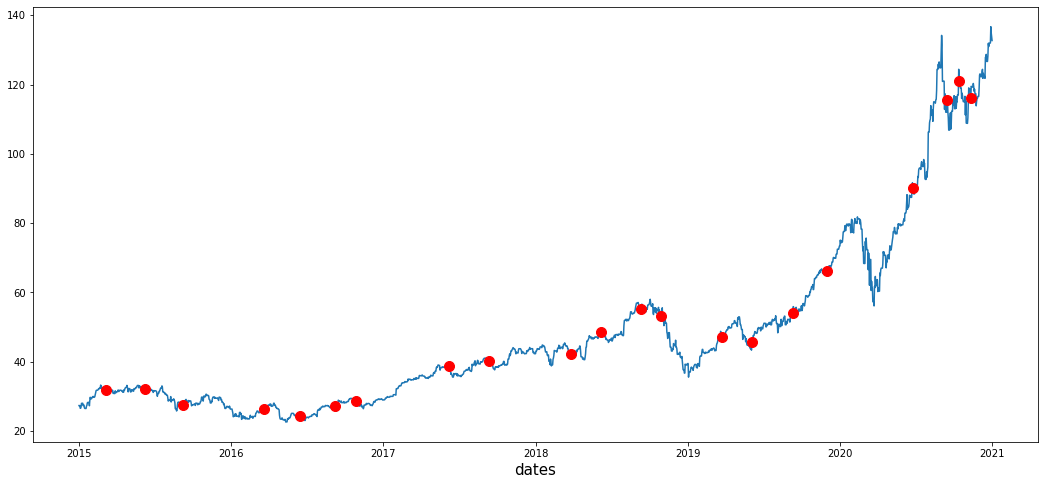

In [16]:
#Plots the dates after adding the 
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(df_filled_data.index,df_filled_data.Close)
ax.set_xlabel("dates",size=15)
ap=ax.scatter(apple_event_and_stock_data.Date, apple_event_and_stock_data.Close, c="r", s=100, zorder=3)
plt.show()

## Group by week

In [60]:
df_weekly_average=df.copy()

In [61]:
#Create a new dataframe containing the weekly average of the stock price
#https://stackoverflow.com/questions/45281297/group-by-week-in-pandas/45281439
df_weekly_average['Date'] = pd.to_datetime(df_weekly_average['Date']) - pd.to_timedelta(7, unit='d')
df_week = df_weekly_average.groupby([pd.Grouper(key='Date', freq='W-MON')]).mean().reset_index().sort_values('Date')


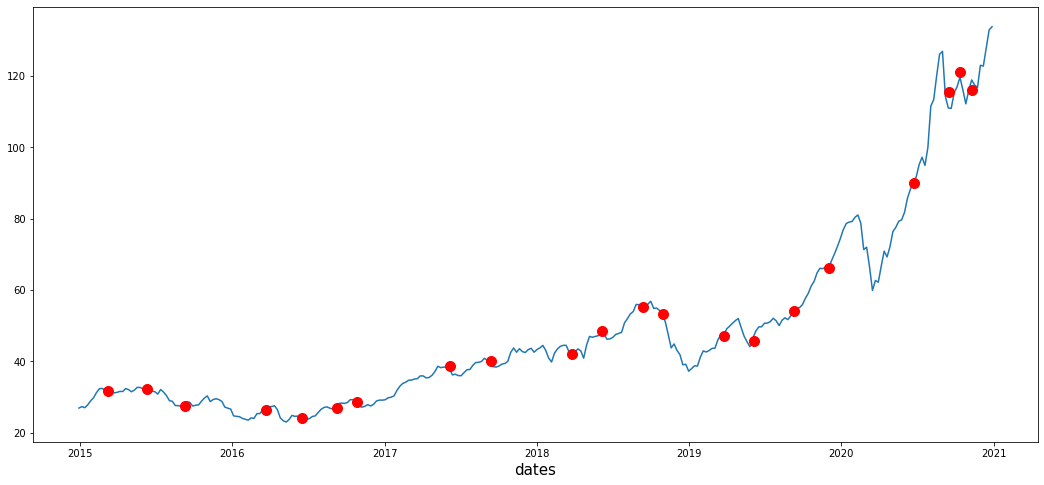

In [69]:
#Plots the weekly average
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(df_week.Date,df_week.Close)
apple_events=ax.set_xlabel("dates",size=15)
ax.scatter(apple_event_and_stock_data.Date, apple_event_and_stock_data.Close, c="r", s=100, zorder=3)

plt.show();

In [63]:
apple_event_and_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
44,2015-03-09,31.990000,32.392502,31.264999,31.785000,28.890726,354114000
109,2015-06-10,31.980000,32.334999,31.962500,32.220001,29.408445,156349200
172,2015-09-09,28.440001,28.504999,27.442499,27.537500,25.248312,340043200
305,2016-03-21,26.482500,26.912500,26.285000,26.477501,24.512644,142010800
365,2016-06-15,24.455000,24.602501,24.257500,24.285000,22.619728,117780800
423,2016-09-07,26.957500,27.190001,26.767500,27.090000,25.369074,169457200
459,2016-10-27,28.847500,28.965000,28.525000,28.620001,26.801878,138248000
611,2017-06-07,38.755001,38.994999,38.619999,38.842499,36.871822,84278400
678,2017-09-12,40.652500,40.990002,39.692501,40.215000,38.324600,286856000
813,2018-03-27,43.419998,43.787498,41.730000,42.084999,40.414974,163690400


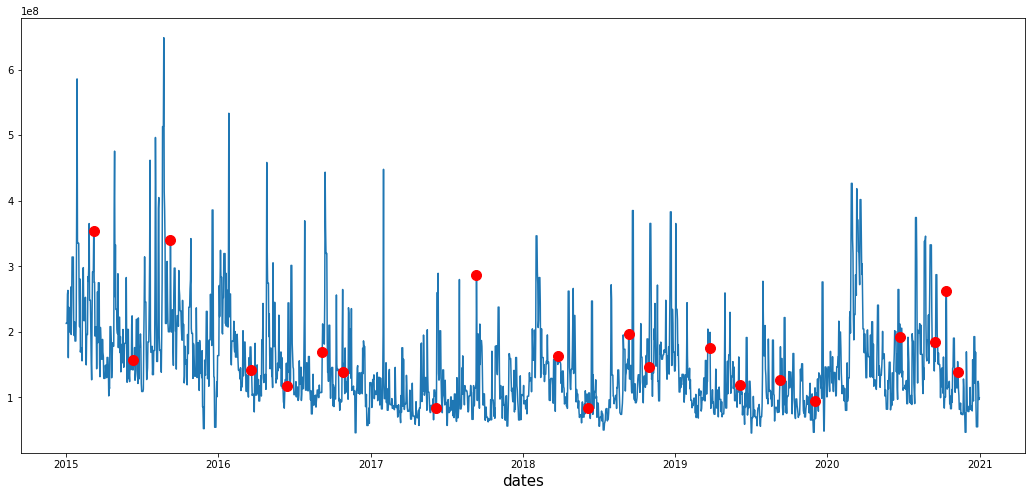

In [68]:
#Plot each trading day and its volume
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(df_filled_data.index,df_filled_data.Volume)
ax.set_xlabel("dates",size=15)
ax.scatter(apple_event_and_stock_data.Date, apple_event_and_stock_data.Volume, c="r", s=100, zorder=3)
plt.show()